el dataset fue obtenido desde aqui "https://www.kaggle.com/datasets/mczielinski/bitcoin-historical-data".
El objetivo es ver si soy capaz de hacer forecast y predecir el valor del bitcoin.

In [2]:
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_pacf
# Cargamos el csv
train = pd.read_csv('btcusd_1-min_data.csv')

print(train.shape)

# Mostramos 10 registros al azar
train.sample(10)

(6750281, 6)


Timestamp      Open      High       Low     Close     Volume
5153743  1.634669e+09  61927.45  62007.56  61927.45  61982.45  12.758371
121735   1.332716e+09      4.54      4.54      4.54      4.54   0.000000
4101678  1.571538e+09   7936.23   7940.06   7936.22   7939.61   0.891849
1787440  1.432669e+09    236.20    236.20    236.20    236.20   3.500175
204277   1.337669e+09      5.08      5.08      5.08      5.08   0.000000
940836   1.381866e+09    139.39    139.40    138.98    138.98   6.506494
2198070  1.457311e+09    408.76    409.67    408.50    408.76  51.516541
2073333  1.449826e+09    423.83    423.83    423.83    423.83   0.088255
2886772  1.498636e+09   2536.41   2539.99   2534.64   2534.65  13.159353
3609859  1.542029e+09   6338.66   6338.66   6338.17   6338.17   0.060967

despues de ver la tabla me voy a centrar en el valor de cierre y es lo que voy a tratar como target
las columnas son: 
Timestamp: el tiempo
Open: el valor cuando empezo a tomar el tiempo
High: el valor mas alto que tomo durante ese tiempo
Low: el valor mas bajo que tomo durante todo ese tiempo
Close: el valor con el que finalizo el tiempo
Volume: transancciones durante ese tiempo

In [4]:
#miro donde hay nulls si los hay
train.isna().sum()

Timestamp    1
Open         0
High         0
Low          0
Close        0
Volume       0
dtype: int64

In [5]:
filas_con_nulos = train[train.isnull().any(axis=1)]
print(filas_con_nulos)

         Timestamp     Open     High      Low    Close    Volume
6750280        NaN  57854.0  57864.0  57835.0  57835.0  1.353466


In [6]:
train = train.dropna()
print(train)

            Timestamp       Open       High        Low      Close    Volume
0        1.325412e+09       4.58       4.58       4.58       4.58  0.000000
1        1.325412e+09       4.58       4.58       4.58       4.58  0.000000
2        1.325412e+09       4.58       4.58       4.58       4.58  0.000000
3        1.325412e+09       4.58       4.58       4.58       4.58  0.000000
4        1.325412e+09       4.58       4.58       4.58       4.58  0.000000
...               ...        ...        ...        ...        ...       ...
6750275  1.737936e+09  102518.00  102559.00  102506.00  102558.00  0.771165
6750276  1.737936e+09  102628.00  102669.00  102608.00  102611.00  0.086742
6750277  1.737936e+09  102659.00  102712.00  102657.00  102712.00  0.488757
6750278  1.737936e+09  102631.00  102631.00  102573.00  102573.00  0.126719
6750279  1.737936e+09  102573.00  102604.00  102507.00  102514.00  0.474495

[6750280 rows x 6 columns]


si bien podria poner el timestamp del unico valor con un null, dicidi borrarlo, un registro arriba o abajo de 6 millones creo que no va a influir

In [8]:
train['Timestamp'] = pd.to_datetime(train['Timestamp'], unit='s') 
train.set_index('Timestamp', inplace=True)
print(train)

                          Open       High        Low      Close    Volume
Timestamp                                                                
2012-01-01 10:01:00       4.58       4.58       4.58       4.58  0.000000
2012-01-01 10:02:00       4.58       4.58       4.58       4.58  0.000000
2012-01-01 10:03:00       4.58       4.58       4.58       4.58  0.000000
2012-01-01 10:04:00       4.58       4.58       4.58       4.58  0.000000
2012-01-01 10:05:00       4.58       4.58       4.58       4.58  0.000000
...                        ...        ...        ...        ...       ...
2025-01-26 23:56:00  102518.00  102559.00  102506.00  102558.00  0.771165
2025-01-26 23:57:00  102628.00  102669.00  102608.00  102611.00  0.086742
2025-01-26 23:58:00  102659.00  102712.00  102657.00  102712.00  0.488757
2025-01-26 23:59:00  102631.00  102631.00  102573.00  102573.00  0.126719
2025-01-27 00:00:00  102573.00  102604.00  102507.00  102514.00  0.474495

[6750280 rows x 5 columns]


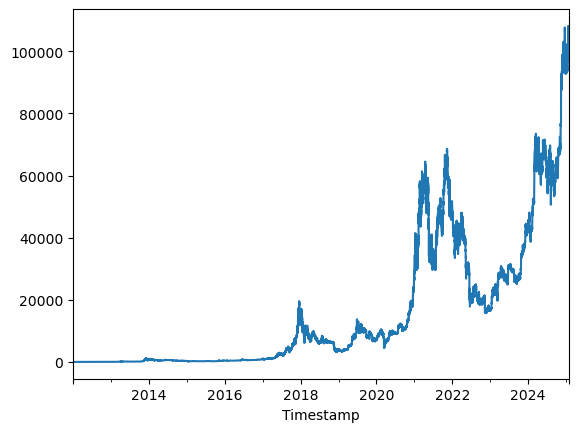

In [9]:
# Calcular la media por hora y rellenar posibles nulos
data_hour = train['Close'].resample('h').mean().ffill()

# Visualizamos la serie completa
data_hour.plot()
plt.show()

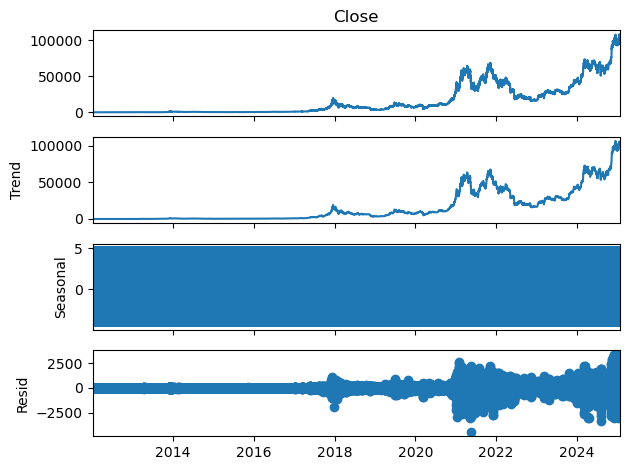

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Descomposición aditiva
resultado = seasonal_decompose(data_hour, model='additive')

# Representamos cada componente
resultado.plot()
plt.tight_layout()
plt.show()

In [11]:
print(data_hour)

Timestamp
2012-01-01 10:00:00         4.580000
2012-01-01 11:00:00         4.580000
2012-01-01 12:00:00         4.580000
2012-01-01 13:00:00         4.580000
2012-01-01 14:00:00         4.580000
                           ...      
2025-01-26 20:00:00    105046.750000
2025-01-26 21:00:00    104778.150000
2025-01-26 22:00:00    104516.550000
2025-01-26 23:00:00    103059.166667
2025-01-27 00:00:00    102514.000000
Freq: h, Name: Close, Length: 114591, dtype: float64


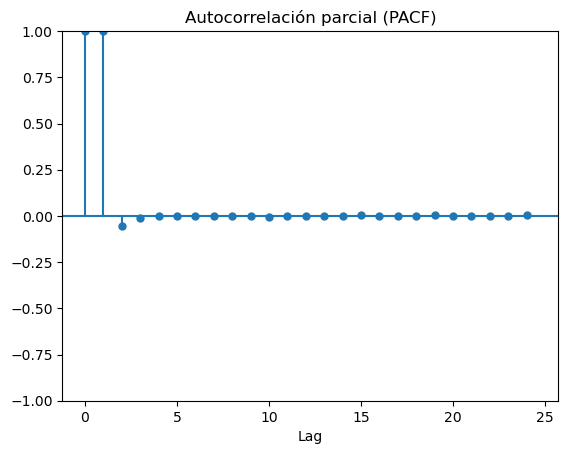

In [12]:
plot_pacf(data_hour, lags=24, method='ywm')
plt.title("Autocorrelación parcial (PACF)")
plt.xlabel('Lag')
plt.show()

mire por internet que hay modelos de obtencion de los hiperparametros de ARIMA y decidi probarlo

#Quitar de Markdown si y solo si esta instalado el paquete de pmdarima  
from pmdarima import auto_arima
# Aplicar auto_arima para encontrar los mejores parámetros
modelo_auto = auto_arima(data_hour, 
                         seasonal=False,  
                         stepwise=True,   
                         trace=True,      
                         error_action='ignore', 
                         suppress_warnings=True)

# Mostrar resumen del modelo seleccionado
print(modelo_auto.summary())

# Obtener los parámetros óptimos
p, d, q = modelo_auto.order

In [15]:
# 1 año a considerar en el conjunto de test
n_steps = 24 * 364

# Dividimos la serie en train y test
train_size = len(data_hour) - n_steps
train, test = data_hour[:train_size], data_hour[train_size:]

# Ajustamos el modelo ARIMA
model = ARIMA(train, order=(2, 1, 1)) #poner p d y q en caso de ejecutar auto_arima
fitted_model = model.fit()

# Forecast
forecast = fitted_model.forecast(steps=n_steps)
forecast_index = test.index

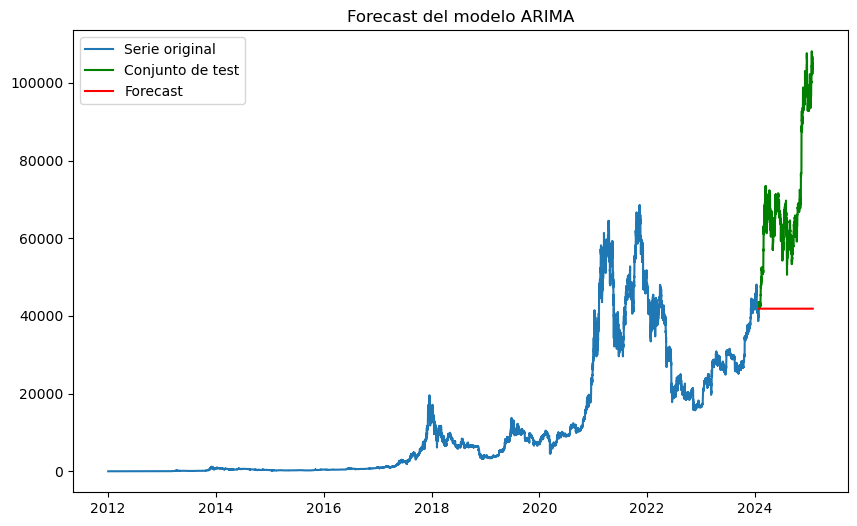

Mean Absolute Error: 28162.132669468436


In [16]:
# Visualizamos los resultados
plt.figure(figsize=(10, 6))
plt.plot(train, label='Serie original')
plt.plot(test.index, test, label='Conjunto de test', color='green')
plt.plot(forecast_index, forecast, label='Forecast', color='red')
plt.legend()
plt.title('Forecast del modelo ARIMA')
plt.show()

# Evaluación del modelo
mae = mean_absolute_error(test, forecast)
print(f'Mean Absolute Error: {mae}')

desgraciadamente el entrenamiento no fue muy bueno y como resultado sale una prediccion mala
# ¿Qué ventajas e inconvenientes observas al resolver el caso de uso planteado anteriormente utilizando Aprendizaje Automático?
Voy a empezar por lo malo:  
. - La parte computacional: en este ejemplo el data set era de 6 millones de registros, una cifra que ya empieza a requerir de equipos especializados, en mi caso, mi pc fue algo lento en cálculo del auto_arima y del arima  
. - La pericia de los datos: aunque el auto_arima puede facilitar la elección de los hiperparametros estoy seguro de que alguien con mucha más experiencia puede sacar un modelo mucho mejor sin el uso de bibliotecas automáticas. Para muestra un ejemplo de porque mi modelo no consigue hacer bien la predicción.  
Y ahora lo bueno:  
. - Predicción de futuro: está claro que el poder tener un algoritmo que ayude con predicciones fiables es algo bueno, no solo en este campo "económico" si no en cualquier otro campo como puede ser la medicina o el medio ambiente.  
. - Facilidad de uso: otro aspecto que me sorprendió es lo fácil que fue hacer el programa, me esperaba algo mucho más complejo o que lo tuviera que programar yo desde 0, el uso de las bibliotecas facilita mucho toda la implementación.  

# Respecto a mi solucion  
Poco que añadir ya que el resultado no salio nada fiable, no sirve como para dar una predicción y por tanto habria que rehacerlo 
